# Descriptive Stats of Personal CS:GO Performance
We look at my overall stats in Deathmatch (DM) and Matchmaking (MM) -- games played, win/loss ratios, k/d ratios, map performance, and performance over time.

In [11]:
# Import packages and define constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#STATS_FILE = "C:\\Users\\Desktop\\Programming\\csgo_stats\\data\\stats_20181219.csv"
STATS_FILE = '../data/stats_20181219.csv'

In [12]:
# Read in file
data = pd.read_csv(STATS_FILE)
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
print('Num rows: ' + str(data.shape[0]) + '.  Num cols: ' + str(data.shape[1]))
data.head()

Num rows: 68.  Num cols: 9


,Date,Map,Game Type,Kills,Assists,Deaths,K-D,Full/Legit Match,Win/Loss
0,2018-09-15,Inferno,DM,27,0,24,3.0,Y,NaN
1,2018-09-15,Mirage,DM,16,6,21,-5.0,Y,NaN
2,2018-09-15,Cache,DM,28,3,22,6.0,Y,NaN
3,2018-09-15,Mirage,DM,24,0,21,3.0,Y,NaN
4,2018-09-15,Cache,DM,25,1,20,5.0,Y,NaN


# Overall Summary

In [13]:
def add_rows(df, rows):
    tmp_df = pd.DataFrame(columns=df.columns, index=range(len(rows)))
    i = 0
    for row in rows:
        tmp_df.iloc[i,:] = row
        i = i + 1
    return pd.concat([df, tmp_df], axis=0, ignore_index=True)

current_date = datetime.datetime.now()
first_date = data['Date'][0]
days_since_first_game = (current_date - first_date).days
tot_dm_games = (data['Game Type'] == 'DM').sum()
tot_mm_games = (data['Game Type'] == 'MM').sum()
tot_mm_w = (data['Win/Loss'] == 'W').sum()
tot_mm_l = (data['Win/Loss'] == 'L').sum()

overall_stats = [
    ['Total Games Played', data.shape[0]],
    ['Days Since First Game Played', days_since_first_game],
    ['Avg games/day', data.shape[0] / days_since_first_game],
    ['Total DM Games', tot_dm_games],
    ['Total MM Games', tot_mm_games],
    ['Total MM Wins', tot_mm_w],
    ['Total MM Losses', tot_mm_l],
]
descriptive_df = pd.DataFrame({'Description': [], 'Value': []})[['Description', 'Value']]
descriptive_df = add_rows(descriptive_df, overall_stats)
descriptive_df.index = descriptive_df.Description
descriptive_df.drop(['Description'], axis=1, inplace=True)
display(descriptive_df)

,Value
Description,
Total Games Played,68
Days Since First Game Played,95
Avg games/day,0.715789
Total DM Games,46
Total MM Games,17
Total MM Wins,4
Total MM Losses,11


# K/D Statistics

In [20]:
kd_stats = [
    ['Total DM kills', data['Kills'][data['Game Type'] == 'DM'].sum()],
    ['Avg DM kills per game', data['Kills'][data['Game Type'] == 'DM'].sum() / tot_dm_games ],
    ['Total DM deaths', data['Deaths'][data['Game Type'] == 'DM'].sum()],
    ['Avg DM deaths per game', data['Deaths'][data['Game Type'] == 'DM'].sum() / tot_dm_games ],
    ['DM K/D Ratio', data['Kills'][data['Game Type'] == 'DM'].sum() / data['Deaths'][data['Game Type'] == 'DM'].sum()],
    ['Total MM kills', data['Kills'][data['Game Type'] == 'MM'].sum()],
    ['Avg MM kills per game', data['Kills'][data['Game Type'] == 'MM'].sum() / tot_mm_games ],
    ['Total MM deaths', data['Deaths'][data['Game Type'] == 'MM'].sum()],
    ['Avg MM deaths per game', data['Deaths'][data['Game Type'] == 'MM'].sum() / tot_mm_games ],
    ['MM K/D Ratio', data['Kills'][data['Game Type'] == 'MM'].sum() / data['Deaths'][data['Game Type'] == 'DM'].sum()],
    ['Avg MM kills per win', data['Kills'][data['Win/Loss'] == 'W'].sum() / tot_mm_w],
    ['Avg MM kills per loss', data['Kills'][data['Win/Loss'] == 'L'].sum() / tot_mm_l],
    ['Avg MM deaths per win', data['Deaths'][data['Win/Loss'] == 'W'].sum() / tot_mm_w],
    ['Avg MM deaths per loss', data['Deaths'][data['Win/Loss'] == 'L'].sum() / tot_mm_l],
    ['Avg K/D per win', data['Kills'][data['Win/Loss'] == 'W'].sum() / data['Deaths'][data['Win/Loss'] == 'W'].sum()],
    ['Avg K/D per loss', data['Kills'][data['Win/Loss'] == 'L'].sum() / data['Deaths'][data['Win/Loss'] == 'L'].sum()]
]
kd_df = pd.DataFrame({'Description': [], 'Value': []})[['Description', 'Value']]
kd_df = add_rows(kd_df, kd_stats)
kd_df.index = kd_df.Description
kd_df.drop(['Description'], axis=1, inplace=True)
display(kd_df)

,Value
Description,
Total DM kills,1089
Avg DM kills per game,23.6739
Total DM deaths,794
Avg DM deaths per game,17.2609
DM K/D Ratio,1.37154
Total MM kills,245
Avg MM kills per game,14.4118
Total MM deaths,322
Avg MM deaths per game,18.9412


# Stats over time

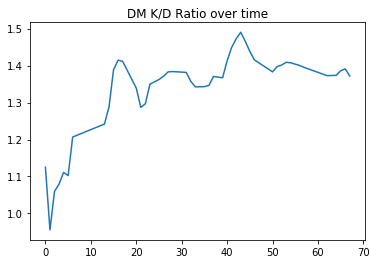

In [32]:
data['kd_ratio'] = data['Kills'] / data['Deaths']
dm_cum_kd_ratio = np.cumsum(data['Kills'][data['Game Type'] == 'DM']) / np.cumsum(data['Deaths'][data['Game Type'] == 'DM'])
plt.plot(data[data['Game Type'] == 'DM'].index, dm_cum_kd_ratio)
plt.title('DM K/D Ratio over time')
plt.show()

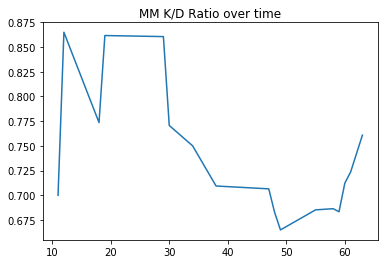

In [33]:
mm_cum_kd_ratio = np.cumsum(data['Kills'][data['Game Type'] == 'MM']) / np.cumsum(data['Deaths'][data['Game Type'] == 'MM'])
plt.plot(data[data['Game Type'] == 'MM'].index, mm_cum_kd_ratio)
plt.title('MM K/D Ratio over time')
plt.show()

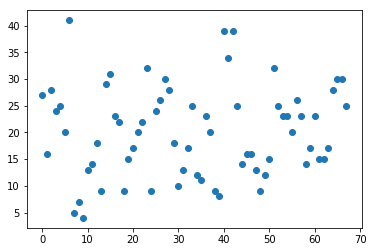

In [24]:
plt.scatter(data.index, data['Kills'])
plt.show()